### Business Understanding

As part of your day to day, you will be required to evaluate how new factors affects
current economics simulation. In this challenge, your task is to evaluate the
impact of a new legislation on a simulation of how well prepared people are for
retirement. Here are the relevant details:
Legislation: https://smartasset.com/retirement/savers-match-secure-2-0-act, new
Saver’s Match (please, ignore the effect of removing the Saver’s Credit). Instead of
50 percent of 2000 being the maximum benefit, consider it being 50 percent of 10000.


Important things to consider:
● Every line in this file represents a head of household, and heads of
households that are not married have to file taxes accordingly.

Deliverables:

● A new file called new_scenario.csv that will have and additional column
called new_accumulated_capital, with will be calculated as:
○ accumulated_capital + additional retirement savings due to Saver’s
Match

● The function should generate 2 plots:

  ○ Weighted Average Retirement Savings Shortfall by Race and Age
Cohort. Age Cohorts defined as the following intervals: [35,39),
[40,44), 45,49), [50,54), [55,59),[60,64)

  ○ Impact in percentage points of the new scenario into the
Retirement Readiness Rating, per Age Cohort.


Additional Notes:

● The phase-out ranges of the Saver's Match should be considered.

● Consider the retirement age of all people to be 65

● Consider that all eligible people (given the eligibility condition for these
programs) will benefit and use the program from the initial age of the
simulation until the retirement age and only during this period.

● Consider inflation (nominal) to be 4.4% per year

● Consider the start year of the simulation results you have got is 2020

● Consider the current year (start of simulation) income will be readjusted by
inflation every year

● The Retirement Readiness Rating is defined as:

○ Number of persons who were able to afford its retirement / Total
number of persons

● The Retirement Savings Shortfall is defined as:

○ Sum of the accumulate of all the persons who had deficits / Total
number of persons


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

In [3]:
import pandas as pd

# URL do arquivo CSV
url = 'https://drive.google.com/uc?id=118yHBRG2ZUk6frQZaVNTNILZcbHJeu28'

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame
df.head()


,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,1,45,591,1,1,1,161474.307306,0.24,248327.61
2,2,59,613,1,1,1,14209.331170,0.09,24371.94
3,3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,4,45,567,2,1,5,282353.182490,0.22,47808.66


- initial_age: the age the person had when this the simulation started
- weight: How many persons of the population this head of household
represent
- income: The annual gross income of the individual.
- family_kind: 1 = Husband-Wife, 2 = Male-Led, 3 = Female-Led
- race: 1= White, 2 = Black, 3 = Hispanic, 4 = Other
- marital_status : 1 = Married, 2 = Widowed, 3 = Divorced, 4 = Separated, 5 =
Never married
- annual_contribution (as % of income): What % of the current income the
individuals contribute to retirement accounts
- accumulated_capital: At this person’s death, the resulting balance
considering all its incomes and expenses, in 2020 US dollars. If it is greater
than or equal zero, it means this person was able to afford his retirement, if
it is lower than zero, it means


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           47626 non-null  int64  
 1   initial_age          47626 non-null  int64  
 2   weight               47626 non-null  int64  
 3   family_kind          47626 non-null  int64  
 4   race                 47626 non-null  int64  
 5   marital_status       47626 non-null  int64  
 6   accumulated_capital  47626 non-null  float64
 7   annual_contribution  47626 non-null  float64
 8   income               47626 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.3 MB


In [5]:
# Resetar o índice das colunas
df = df.drop('Unnamed: 0', axis = 1).reset_index(drop=True)

# Verificar o DataFrame com o novo índice das colunas
df.head()


,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66


In [6]:
df.describe()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
count,47626.000000,47626.000000,47626.000000,47626.000000,47626.000000,4.762600e+04,47626.000000,47626.000000
mean,48.379793,1551.159535,1.730756,1.693634,2.245454,2.483036e+04,0.175277,70240.892997
std,8.064861,942.788098,0.852361,1.014817,1.554839,1.705045e+05,0.101389,49720.565014
min,35.000000,98.000000,1.000000,1.000000,1.000000,-5.119091e+05,0.000000,250.650000
25%,42.000000,811.250000,1.000000,1.000000,1.000000,-8.116163e+04,0.090000,33878.760000
50%,48.000000,1500.000000,1.000000,1.000000,1.000000,2.280218e+04,0.180000,59084.150000
75%,55.000000,1971.000000,3.000000,2.000000,3.000000,1.016781e+05,0.260000,94320.602500
max,63.000000,9349.000000,3.000000,4.000000,5.000000,1.111905e+06,0.350000,473601.750000


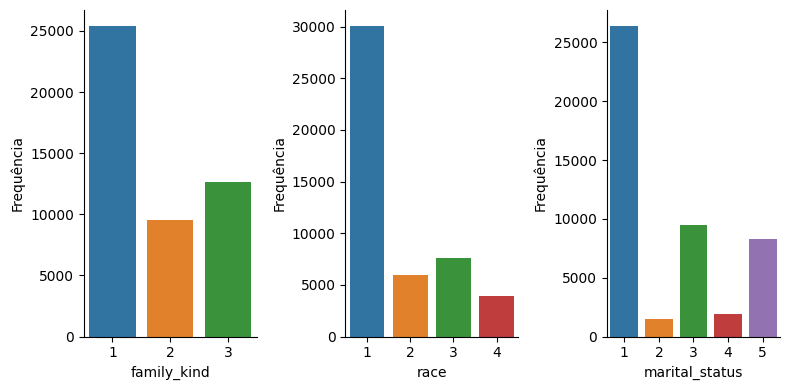

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis qualitativas
variaveis_qualitativas = ['family_kind', 'race', 'marital_status']

# Configurar o tamanho da figura
plt.figure(figsize=(8, 4))

# Criar gráficos de barras para cada variável qualitativa
for i, variavel in enumerate(variaveis_qualitativas, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=variavel, data=df)
    plt.xlabel(variavel)
    plt.ylabel('Frequência')
    sns.despine()

# Exibir os gráficos lado a lado
plt.tight_layout()
plt.show()


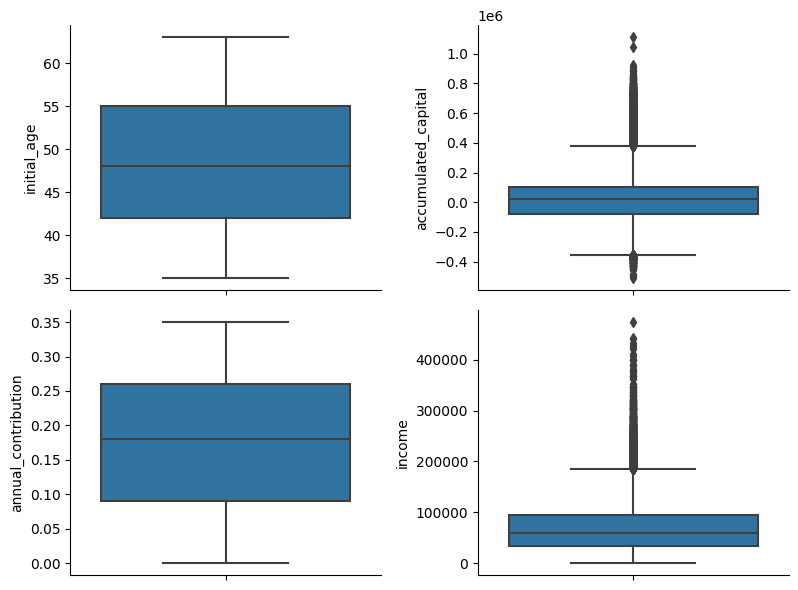

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis qualitativas
variaveis_quantitativas = ['initial_age', 'accumulated_capital', 'annual_contribution', 'income']

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar gráficos boxplot em 2 colunas e 2 linhas
for i, variavel in enumerate(variaveis_quantitativas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=variavel, data=df)
    sns.despine()

# Exibir os gráficos
plt.tight_layout()
plt.show()


### Data Processing

In [9]:
# Calcular a quantidade de anos até a aposentadoria.

retirement_age = 65
df['time_to_retire'] = retirement_age - df['initial_age']
df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8
1,45,591,1,1,1,161474.307306,0.24,248327.61,20


In [10]:
# Definir classes de solteiros (Nunca Casou, Viuvos, Divorciados e Separados)

# Criar a coluna 'is_married'
df['is_married'] = df['marital_status'].apply(lambda x: 1 if x == 1 else 0)
df.head(2)


,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1


In [11]:
# Reajustar Income 4,4% a cada ano

# Criar a coluna 'savers_type'
df['savers_type'] = df.apply(lambda row: 0 if row['is_married'] == 0 else (1 if row['family_kind'] == 1 else 2), axis=1)
df.head(2)

# Criar Coluna de benefício pelo Saver's Match.

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1


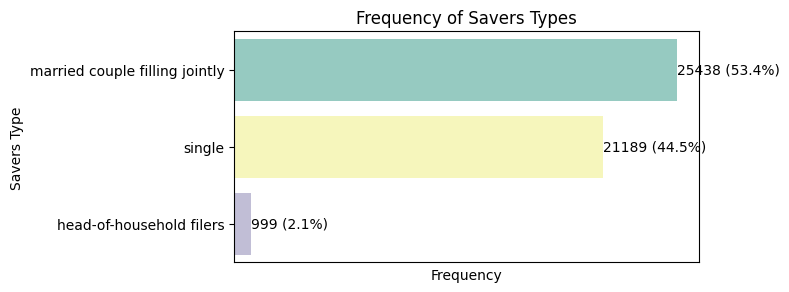

In [12]:
# Mapear os valores para as labels correspondentes
label_map = {0: 'single', 1: 'married couple filling jointly', 2: 'head-of-household filers'}
df['savers_type_label'] = df['savers_type'].map(label_map)

# Calcular a frequência dos valores
frequencies = df['savers_type_label'].value_counts()

# Ordenar os valores de forma decrescente
frequencies = frequencies.sort_values(ascending=False)

# Calcular a porcentagem de cada categoria
percentages = (frequencies / frequencies.sum()) * 100

# Configurar o tamanho da figura
plt.figure(figsize=(6, 3))

# Criar o gráfico de barras laterais
sns.barplot(x=frequencies, y=frequencies.index, palette='Set3')

# Adicionar as porcentagens ao lado de cada barra
for i, v in enumerate(frequencies):
    plt.text(v + 1, i, f'{v} ({percentages[i]:.1f}%)', va='center')

# Remover a escala do eixo horizontal
plt.xticks([])

# Configurar os rótulos e título do gráfico
plt.xlabel('Frequency')
plt.ylabel('Savers Type')
plt.title('Frequency of Savers Types')

# Exibir o gráfico
plt.show()






In [13]:
# Criar varíaveis de minima máxima contribuição

married_income_max = 71000
single_income_max = 35500
head_income_max = 53250

In [14]:
# Criar Coluna de contribuição total pelo Saver's Match até a aposentadoria. (sem beneficio)

# Calcular a correção de inflação anual
inflation_rate = 0.044

# Criar a coluna 'savers_match_savings'
df['savers_match_savings'] = df.apply(lambda row: row['annual_contribution'] * row['income'] * (1 + inflation_rate) ** row['time_to_retire'], axis=1)
df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292


In [15]:
# Criar a coluna 'savers_match_benefit'
df['savers_match_benefit'] = df['savers_match_savings'].apply(lambda x: x * 0.5 if x <= 10000 else 5000)
df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.0
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.0


In [16]:
# Definir os valores correspondentes para cada tipo de savers_type
married_income_max = 71000
single_income_max = 35500
head_income_max = 53250

# Criar a coluna 'phase_out_final' com os valores correspondentes
df['phase_out_final'] = df['savers_type_label'].apply(lambda x: married_income_max if x == 'married couple filling jointly' else (single_income_max if x == 'single' else head_income_max))

inflation_rate = 0.044

# Aplicar a correção da inflação para cada valor em 'phase_out_final'
df['phase_out_final'] = df['phase_out_final'] * (1 + inflation_rate) ** df['time_to_retire']


df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit,phase_out_final
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.0,50099.378968
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.0,167984.156137


In [17]:
# Criar coluna do 'income_final' para obtermos a renda ajustada no ano da aposentadoria
df['income_final'] = df['income'] * (1 + inflation_rate) ** df['time_to_retire']
df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit,phase_out_final,income_final
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.0,50099.378968,60201.135493
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.0,167984.156137,587536.676218


In [18]:
# Definido os elegíiveis para receber o benefício
df['is_eligible'] = df.apply(lambda row: 1 if row['phase_out_final'] > row['income_final'] else 0, axis=1)
df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit,phase_out_final,income_final,is_eligible
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.0,50099.378968,60201.135493,0
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.0,167984.156137,587536.676218,0


In [21]:
# Calculando novo capital acumulado
df['new_accumalated_capital'] = df.apply(lambda row: row['accumulated_capital'] + row['savers_match_savings'] + row['savers_match_benefit']
                                         if row['is_eligible'] == 1   else row['accumulated_capital'] + row['savers_match_savings'], axis=1)

df.head(2)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit,phase_out_final,income_final,is_eligible,new_accumalated_capital
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.0,50099.378968,60201.135493,0,-139416.939596
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.0,167984.156137,587536.676218,0,302483.109598


In [23]:
#criando a tag dos elegíveis a se aposentar
df['is_able_to_retire'] = df.apply(lambda row: 1 if row['new_accumalated_capital'] >= 0 else 0, axis=1)
df.head(5)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_to_retire,is_married,savers_type,savers_type_label,savers_match_savings,savers_match_benefit,phase_out_final,income_final,is_eligible,new_accumalated_capital,is_able_to_retire
0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,0,0,single,13846.261163,5000.000000,50099.378968,60201.135493,0,-139416.939596,0
1,45,591,1,1,1,161474.307306,0.24,248327.61,20,1,1,married couple filling jointly,141008.802292,5000.000000,167984.156137,587536.676218,0,302483.109598,1
2,59,613,1,1,1,14209.331170,0.09,24371.94,6,1,1,married couple filling jointly,2840.112882,1420.056441,91930.863772,31556.809803,1,18469.500494,1
3,62,656,1,1,1,-77270.897162,0.17,48788.04,3,1,1,married couple filling jointly,9437.648290,4718.824145,80790.416064,55515.578177,1,-63114.424726,0
4,45,567,2,1,5,282353.182490,0.22,47808.66,20,0,0,single,24885.090554,5000.000000,83992.078069,113114.047974,0,307238.273045,1


### Deliverables

In [30]:
new_scenario = df[['income_final','initial_age', 'weight', 'family_kind', 'race', 'marital_status',
       'accumulated_capital', 'annual_contribution', 'income'
       ,'new_accumalated_capital']]

new_scenario.to_csv("new_scenario.csv",index=False)

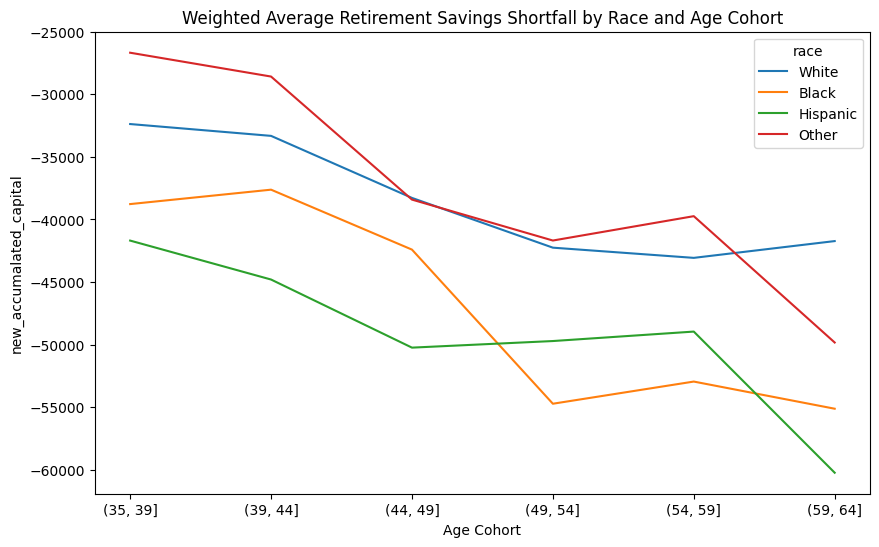

In [35]:


# Mapear os valores numéricos das raças para as labels correspondentes
race_labels = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other'}

# Agrupar os dados por faixa etária e raça
grouped_data = df.groupby([pd.cut(df['initial_age'], bins=[35, 39, 44, 49, 54, 59, 64]), 'race'])

# Calcular o déficit médio ponderado de economias para a aposentadoria
weighted_avg_deficit = grouped_data.apply(lambda x: (x['new_accumalated_capital'][x['is_able_to_retire'] == 0] * x['weight']).sum() / x['weight'].sum())

# Reorganizar a ordem dos níveis de índice
weighted_avg_deficit = weighted_avg_deficit.unstack(level=1)

# Mapear os valores numéricos das raças para as labels correspondentes
weighted_avg_deficit.columns = weighted_avg_deficit.columns.map(race_labels)

# Criar o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))
weighted_avg_deficit.plot(kind='line', ax=ax)

# Configurar o título e os rótulos dos eixos
ax.set_title('Weighted Average Retirement Savings Shortfall by Race and Age Cohort')
ax.set_xlabel('Age Cohort')
ax.set_ylabel('new_accumalated_capital')

# Exibir o gráfico
plt.show()


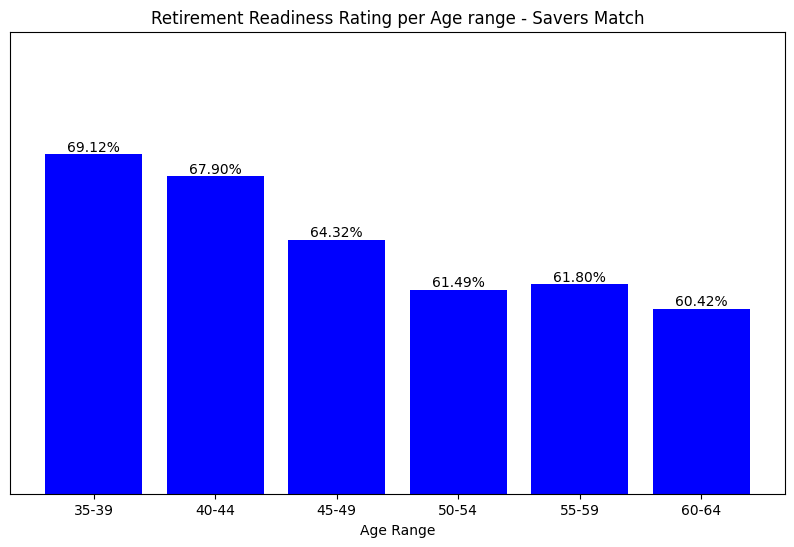

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

faixas_etarias = [(35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64)]

# Filtrar o DataFrame para incluir apenas as linhas em que df['is_able_to_retire'] é igual a 1
filtered_df = df[df['is_able_to_retire'] == 1]

# Calcular o número total de pessoas em cada faixa etária
total_pessoas_por_faixa = df.groupby(pd.cut(df['initial_age'], bins=[faixa[0] for faixa in faixas_etarias] + [faixas_etarias[-1][-1]]))['weight'].count()

# Calcular o número de pessoas que conseguiram se aposentar em cada faixa etária
pessoas_aposentadas_por_faixa = filtered_df.groupby(pd.cut(filtered_df['initial_age'], bins=[faixa[0] for faixa in faixas_etarias] + [faixas_etarias[-1][-1]]))['weight'].count()

# Calcular a proporção em cada faixa etária
proporcoes = pessoas_aposentadas_por_faixa / total_pessoas_por_faixa

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(faixas_etarias)), proporcoes, align='center', color='blue')

# Adicionar as porcentagens sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2%}', ha='center', va='bottom')

# Configurar o eixo x
plt.xticks(range(len(faixas_etarias)), [f'{faixa[0]}-{faixa[1]}' for faixa in faixas_etarias])
plt.xlabel('Age Range')

# Ajustar a escala do eixo y para realçar as diferenças
plt.ylim(0.5, max(proporcoes) * 1.1)

# Remover a escala do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Adicionar título ao gráfico
plt.title('Retirement Readiness Rating per Age range - Savers Match')

# Mostrar o gráfico
plt.show()

